In [1]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import imutils
from ultralytics import YOLO
import numpy as np
import easyocr

C:\Users\user\anaconda3\envs\face\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [181]:
model = YOLO(r"C:\Users\user\Downloads\best (1).pt")
model1 = YOLO(r"C:\Users\user\Downloads\best (2).pt")


0: 640x640 1 Add1, 1 Add2, 1 Birth, 1 FN, 1 Face, 1 Id, 1 LN, 226.3ms
Speed: 8.5ms preprocess, 226.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Birth, 1 Ex_d, 1 Ex_m, 1 Ex_y, 1 Gender, 1 Id, 1 Job, 1 Marital_status, 1 Religion, 52.4ms
Speed: 3.0ms preprocess, 52.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


{'Job': ['طالب .', 'كلية الهندسه-جامعة عين شمس'], 'Gender': 'دذكر', 'Marital_status': 'أعزب', 'Partner': '', 'Religion': 'مسيحى', 'Id': '٢٩٦٠٧٢٢١١٠٣٦٩٣', 'Ex': '٢٠٢٣/٠٢/٢٣'}
{'First Name': 'مارك', 'Last Name': 'يوسف فريد ابراهيم جرجس', 'Address 1': 'ش جامعة الدول العربيه-الحسنية', 'Address 2': 'المنصوره ثان - الدقهلية', 'Id': '٢٩٨٠١١٠١٢٠٠٧٥٧', 'Birth_Date': '١٩٩٨/٠١/١٠'}


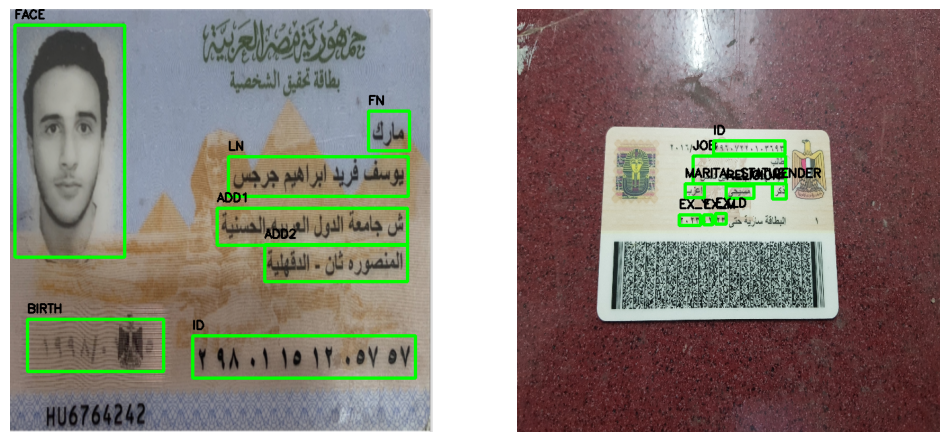

In [341]:
def preprocess(img, form):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    image_array = np.array(gray)
    if form == 'txt':
        q = 0.81
    elif form == 'num':
        q = 0.69
    else:
        q = form
    mask = image_array < np.average(img) * q
    masked_image = np.zeros_like(image_array)
    masked_image[mask] = image_array[mask]
    thresh = cv2.threshold(masked_image, 0, 255, cv2.THRESH_BINARY_INV)[1]
    return thresh

def back(names, class_id, croped_img):
    
    global Job, Gender, Marital_status, Partner, Religion, Id_back, Ex_y, Ex_m, Ex_d 
    
    if names[class_id] in ('Gender', 'Marital_status', 'Partner', 'Religion'):
        thresh = preprocess(croped_img, 'txt')
        blur = cv2.GaussianBlur(thresh,(3,3),4)
        text = pytesseract.image_to_string(blur, lang="ara", config="--psm 7").split('\n')
        if names[class_id] == 'Gender':
            Gender = text[0]
        elif names[class_id] == 'Marital_status':
            Marital_status = text[0]
        elif names[class_id] == 'Partner':
            thresh = preprocess(croped_img, 0.8)
            blur = cv2.GaussianBlur(thresh,(3,3),4)
            text = pytesseract.image_to_string(blur, lang="ara", config="--psm 7").split('\n')
            Partner = text[0]
        elif names[class_id] == 'Religion':
            Religion = text[0]
            
    elif names[class_id] == 'Job':
        thresh = preprocess(croped_img, 'txt')
        blur = cv2.GaussianBlur(thresh,(3,3),4)
        text = pytesseract.image_to_string(blur, lang="ara", config="--psm 1")
        if text.isspace:
            text = pytesseract.image_to_string(blur, lang="ara", config="--psm 6").split('\n')
            Job = text[:-1]
        else:
            Job = text.split('\n')[:-1]
        
    elif names[class_id] in ("Id", 'Ex_d', 'Ex_m', 'Ex_y') :
        thresh = preprocess(croped_img, 'num')
        blur = cv2.GaussianBlur(thresh,(3,3),4)
        text = pytesseract.image_to_string(blur, lang='arabic_numbers', config='--psm 6').split('\n')
        if names[class_id] == 'Id':  
            # thresh = preprocess(croped_img, 0.9)
            # blur = cv2.GaussianBlur(thresh,(3,3),4)
            # text = pytesseract.image_to_string(thresh, lang='arabic_numbers', config='--psm 6').split('\n')
            Id_back = text[0].split(' ')
            Id_back = ''.join(Id_back)
        elif names[class_id] == 'Ex_d':
            Ex_d = text[0]
        elif names[class_id] == 'Ex_m':
            Ex_m = text[0].split(' ') 
            Ex_m = ''.join(Ex_m) + '/'
        elif names[class_id] == 'Ex_y':
            Ex_y = text[0] + '/'

def front(names, class_id, croped_img):
    
    global FN, LN, Add1, Add2, Id, Birth_Date, Face
    
    if names[class_id] in ('Add1', 'Add2', 'FN', 'LN'):
        if names[class_id] == 'Add1':
            thresh = preprocess(croped_img, 'txt')
            blur = cv2.GaussianBlur(thresh,(3,3),4)
            text = pytesseract.image_to_string(blur, lang="ara", config="--psm 7").split('\n')
            Add1 = text[0]     
        elif names[class_id] == 'Add2': 
            thresh = preprocess(croped_img, 0.7)
            blur = cv2.GaussianBlur(thresh,(3,3),4)
            text = pytesseract.image_to_string(blur, lang="ara", config="--psm 7").split('\n')
            Add2 = text[0]     
        elif names[class_id] == 'FN':
            thresh = preprocess(croped_img, 'txt')
            blur = cv2.GaussianBlur(thresh,(3,3),4)
            text = pytesseract.image_to_string(blur, lang="ara", config="--psm 7").split('\n')
            FN = text[0]          
        elif names[class_id] == 'LN':
            thresh = preprocess(croped_img, 'txt')
            blur = cv2.GaussianBlur(thresh,(3,3),4)
            text = pytesseract.image_to_string(blur, lang="ara", config="--psm 8").split('\n')
            
            LN = text[0]
        
    elif names[class_id] == 'Id' :
        thresh = preprocess(croped_img, 'num')
        blur = cv2.GaussianBlur(thresh,(3,3),4)
        text = pytesseract.image_to_string(blur, lang='arabic_numbers', config='--psm 6').split('\n')
        Id = text[0].split(' ')
        Id = ''.join(Id)
        text_id = Id        
        if text_id[0]=='٢': 
            yy = '١٩' + text_id[1:3]
        else:
            yy = '٢٠' + text_id[1:3]
        mm = text_id[3:5]
        dd = text_id[5:7]
        Birth_Date = yy + '/' + mm + '/'+ dd
        
path = path = [r"F:\ai\ASDC\OCR\img\Screenshot 2023-07-11 123555.png", r"img/20190504_185343.jpg"]

Job, Gender, Marital_status, Partner, Religion, Id_back, Ex_y, Ex_m, Ex_d = '', '', '', '', '', '', '', '', ''
FN, LN, Add1, Add2, Id, Birth_Date = '', '', '', '', '', ''

for i, im in enumerate(path):       
    
    org = cv2.imread(im)
    h, w, _ = org.shape
    img = cv2.resize(org, (640, 640))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    outs_info = model1(img_rgb)[0]
    names = outs_info.names
    for out in outs_info.boxes.data.tolist():
    
        x1, y1, x2, y2, score, class_id = out
        if score > 0.5:
            cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(img_rgb, outs_info.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

            x1, y1, x2, y2 = int((x1/640) * w), int((y1/640) * h), int((x2/640) * w), int((y2/640) * h)
            croped_img = org[y1:y2, x1:x2]
            if i == 0:
                front(names, class_id, croped_img)
                img_front = img_rgb
            elif i == 1:
                back(names, class_id, croped_img)
                img_back = img_rgb
                
                
        
print({'Job':Job, 'Gender':Gender, 'Marital_status':Marital_status, 'Partner':Partner, 'Religion':Religion, 'Id':Id_back, 'Ex': Ex_y + Ex_m + Ex_d})
print({'First Name':FN, 'Last Name':LN, 'Address 1':Add1, 'Address 2':Add2, 'Id':Id, 'Birth_Date':Birth_Date})

fig = plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_front)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_back)
plt.axis('off')

plt.show()


0: 640x640 1 Add1, 1 Add2, 1 Birth, 1 FN, 1 Face, 1 Id, 1 LN, 210.0ms
Speed: 4.5ms preprocess, 210.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Ex_d, 1 Ex_m, 1 Ex_y, 1 Gender, 1 Id, 1 Job, 1 Marital_status, 1 Religion, 52.3ms
Speed: 3.0ms preprocess, 52.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


{'Job': ['طالب'], 'Gender': 'دكر', 'Marital_status': 'اعزب', 'Partner': '', 'Religion': 'مسلم', 'Id': '٣٠٠٠٨١٦١٢٠٢٠٣٢', 'Ex': '٢٠٢٨/٠٩/٢١'}
{'First Name': 'السيد', 'Last Name': 'ابراهيم جمعه حسنين', 'Address 1': '* ح داودش زغلول', 'Address 2': 'المطريه - القاهره \u200f', 'Id': '٢٦٨٠٦٠١٠١٠٢٠١٧', 'Birth_Date': '١٩٦٨/٠٦/٠١'}


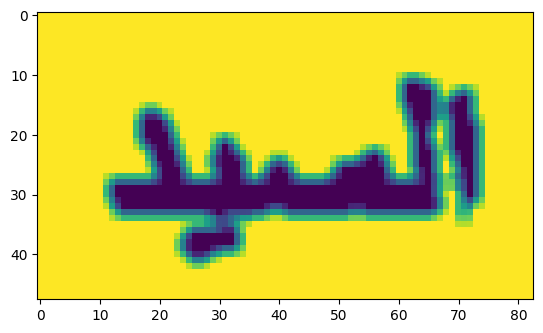

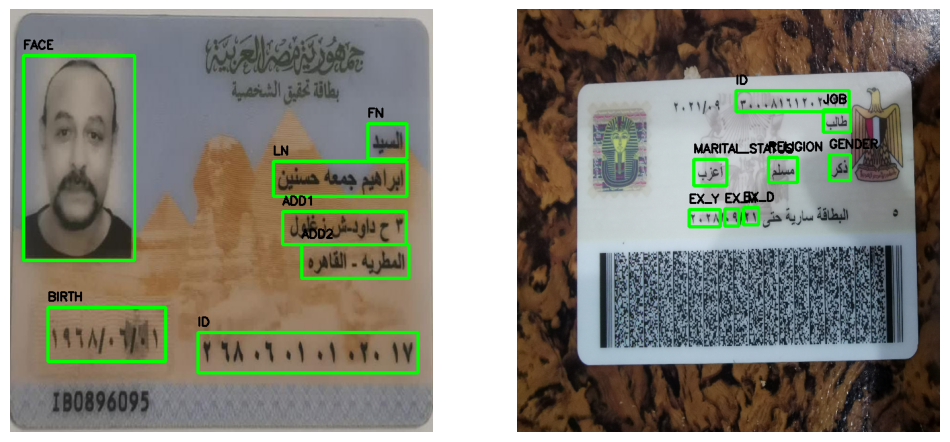

In [362]:
# reader = easyocr.Reader(["ar"])

def preprocess(img, form):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    image_array = np.array(gray)
    if form == 'txt':
        q = 0.81
    elif form == 'num':
        q = 0.69
    else:
        q = form
    mask = image_array < np.average(img) * q
    masked_image = np.zeros_like(image_array)
    masked_image[mask] = image_array[mask]
    thresh = cv2.threshold(masked_image, 0, 255, cv2.THRESH_BINARY_INV)[1]
    return thresh

def back(names, class_id, croped_img):
    
    global Job, Gender, Marital_status, Partner, Religion, Id_back, Ex_y, Ex_m, Ex_d 
    
    if names[class_id] in ('Gender', 'Marital_status', 'Partner', 'Religion'):
        lower = (0, 0, 0)
        upper =(int(np.average(croped_img[:,:,0])*0.8),int(np.average(croped_img[:,:,1])*0.8),int(np.average(croped_img[:,:,2])*0.9))
        img_rgb_inrange = cv2.inRange(croped_img, lower, upper)
        neg_rgb_image = ~img_rgb_inrange
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
        opening = cv2.morphologyEx(neg_rgb_image, cv2.MORPH_OPEN, kernel, iterations=1)
        thresh = cv2.GaussianBlur(neg_rgb_image,(3,3),4)
        text = pytesseract.image_to_string(thresh, lang="ara", config="--psm 7").split('\n')
        if names[class_id] == 'Gender':
            Gender = text[0]
        elif names[class_id] == 'Marital_status':
            Marital_status = text[0]
        elif names[class_id] == 'Partner':
            text = pytesseract.image_to_string(blur, lang="ara", config="--psm 7").split('\n')
            Partner = text[0]
        elif names[class_id] == 'Religion':
            Religion = text[0]
            
    elif names[class_id] == 'Job':
        lower = (0, 0, 0)
        upper =(int(np.average(croped_img[:,:,0])*0.8),int(np.average(croped_img[:,:,1])*0.8),int(np.average(croped_img[:,:,2])*0.9))
        img_rgb_inrange = cv2.inRange(croped_img, lower, upper)
        neg_rgb_image = ~img_rgb_inrange
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
        opening = cv2.morphologyEx(neg_rgb_image, cv2.MORPH_OPEN, kernel, iterations=1)
        thresh = cv2.GaussianBlur(neg_rgb_image,(3,3),4)
        text = pytesseract.image_to_string(thresh, lang="ara", config="--psm 1")
        if text.isspace:
            text = pytesseract.image_to_string(thresh, lang="ara", config="--psm 6").split('\n')
            Job = text[:-1]
        else:
            Job = text.split('\n')[:-1]
        
    elif names[class_id] in ("Id", 'Ex_d', 'Ex_m', 'Ex_y') :
        lower = (0, 0, 0)
        upper =(int(np.average(croped_img[:,:,0])*0.8),int(np.average(croped_img[:,:,1])*0.8),int(np.average(croped_img[:,:,2])*0.9))
        img_rgb_inrange = cv2.inRange(croped_img, lower, upper)
        neg_rgb_image = ~img_rgb_inrange
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
        opening = cv2.morphologyEx(neg_rgb_image, cv2.MORPH_OPEN, kernel, iterations=1)
        thresh = cv2.GaussianBlur(neg_rgb_image,(3,3),4)
        text = pytesseract.image_to_string(thresh, lang='arabic_numbers', config='--psm 6').split('\n')
        if names[class_id] == 'Id':  
            # thresh = preprocess(croped_img, 0.9)
            # blur = cv2.GaussianBlur(thresh,(3,3),4)
            # text = pytesseract.image_to_string(thresh, lang='arabic_numbers', config='--psm 6').split('\n')
            Id_back = text[0].split(' ')
            Id_back = ''.join(Id_back)
        elif names[class_id] == 'Ex_d':
            Ex_d = text[0]
        elif names[class_id] == 'Ex_m':
            Ex_m = text[0].split(' ') 
            Ex_m = ''.join(Ex_m) + '/'
        elif names[class_id] == 'Ex_y':
            Ex_y = text[0] + '/'

def front(names, class_id, croped_img):
    
    global FN, LN, Add1, Add2, Id, Birth_Date, Face
    
    if names[class_id] in ('Add1', 'Add2', 'FN', 'LN'):
        lower = (0, 0, 0)
        upper =(int(np.average(croped_img[:,:,0])*0.75),int(np.average(croped_img[:,:,1])*0.8),int(np.average(croped_img[:,:,2])*0.9))
        img_rgb_inrange = cv2.inRange(croped_img, lower, upper)
        neg_rgb_image = ~img_rgb_inrange
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
        opening = cv2.morphologyEx(neg_rgb_image, cv2.MORPH_OPEN, kernel, iterations=1)
        thresh = cv2.GaussianBlur(neg_rgb_image,(3,3),4)
        
        if names[class_id] == 'Add1':
            text = pytesseract.image_to_string(thresh, lang="ara", config="--psm 7").split('\n')
            Add1 = text[0]     
        elif names[class_id] == 'Add2': 
            text = pytesseract.image_to_string(thresh, lang="ara", config="--psm 8").split('\n')
            Add2 = text[0]     
        elif names[class_id] == 'FN':
            text = pytesseract.image_to_string(thresh, lang="ara", config="--psm 9").split('\n')
            plt.imshow(thresh)
#             results = reader.readtext(thresh)

#             text = ""
#             for t in results:
#                 text +=t[1]
            FN = text[0]
        elif names[class_id] == 'LN':
            text = pytesseract.image_to_string(thresh, lang="ara", config="--psm 8").split('\n')
            LN = text[0]
        
    elif names[class_id] == 'Id' :
        lower = (0, 0, 0)
        upper =(int(np.average(croped_img[:,:,0])*0.8),int(np.average(croped_img[:,:,1])*0.8),int(np.average(croped_img[:,:,2])*0.9))
        img_rgb_inrange = cv2.inRange(croped_img, lower, upper)
        neg_rgb_image = ~img_rgb_inrange
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
        opening = cv2.morphologyEx(neg_rgb_image, cv2.MORPH_OPEN, kernel, iterations=1)
        thresh = cv2.GaussianBlur(neg_rgb_image,(3,3),4)
        text = pytesseract.image_to_string(thresh, lang='arabic_numbers', config='--psm 6').split('\n')
        Id = text[0].split(' ')
        Id = ''.join(Id)
        text_id = Id        
        if text_id[0]=='٢': 
            yy = '١٩' + text_id[1:3]
        else:
            yy = '٢٠' + text_id[1:3]
        mm = text_id[3:5]
        dd = text_id[5:7]
        Birth_Date = yy + '/' + mm + '/'+ dd
        
path = [r"F:\ai\ASDC\OCR\dataset2\dataset2\WhatsApp Image 2023-10-26 at 3.38.57 PM.jpeg", r"F:\New folder\back face.jpg"]

Job, Gender, Marital_status, Partner, Religion, Id_back, Ex_y, Ex_m, Ex_d = '', '', '', '', '', '', '', '', ''
FN, LN, Add1, Add2, Id, Birth_Date = '', '', '', '', '', ''

for i, im in enumerate(path):       
    
    org = cv2.imread(im)
    h, w, _ = org.shape
    img = cv2.resize(org, (640, 640))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    outs_info = model1(img_rgb)[0]
    names = outs_info.names
    for out in outs_info.boxes.data.tolist():
    
        x1, y1, x2, y2, score, class_id = out
        if score > 0.5:
            cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(img_rgb, outs_info.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

            x1, y1, x2, y2 = int((x1/640) * w), int((y1/640) * h), int((x2/640) * w), int((y2/640) * h)
            croped_img = cv2.cvtColor(org[y1:y2, x1:x2], cv2.COLOR_BGR2RGB)
            
            if i == 0:
                front(names, class_id, croped_img)
                img_front = img_rgb
            elif i == 1:
                back(names, class_id, croped_img)
                img_back = img_rgb
                
                
        
print({'Job':Job, 'Gender':Gender, 'Marital_status':Marital_status, 'Partner':Partner, 'Religion':Religion, 'Id':Id_back, 'Ex': Ex_y + Ex_m + Ex_d})
print({'First Name':FN, 'Last Name':LN, 'Address 1':Add1, 'Address 2':Add2, 'Id':Id, 'Birth_Date':Birth_Date})

fig = plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_front)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_back)
plt.axis('off')

plt.show()

In [21]:
model_card = YOLO(r"C:\Users\user\Downloads\model_card_last.pt")



0: 640x640 5 Cards, 376.4ms
Speed: 4.5ms preprocess, 376.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


0.8105023503303528


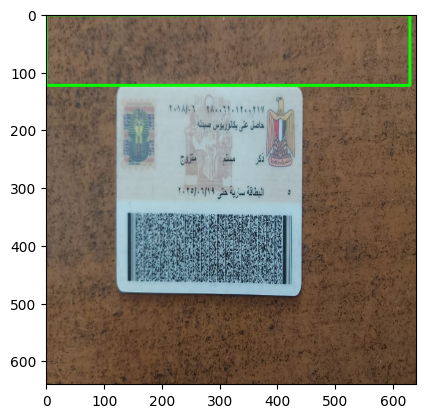

In [24]:
org = cv2.imread(r"F:\ai\ASDC\OCR\dataset2\dataset2\WhatsApp Image 2023-03-18 at 12.04.30.jpeg")
h, w, _ = org.shape
img = cv2.resize(org, (640, 640))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
outs_info = model_card(img_rgb)[0]
names = outs_info.names
for out in outs_info.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = out
    if score > 0.81:
        print(score)
        cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
        cv2.putText(img_rgb, outs_info.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
plt.imshow(img_rgb)